### 딥러닝 연습 - 회귀

In [1]:
# 데이터 가져오기, 평탄화

import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("../titanic.csv")

print(df.head())  # 데이터 확인

print(df['Survived'].value_counts())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Su

In [2]:
# 데이터 체크

# 1. 필요없는 특징(노이즈) 제거
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])


# 2. 레이블의 값 개수 확인
print(df['Survived'].value_counts())
    # value_counts(): 열의 각 값의 개수를 반환


# 3. 결측치 확인, 없애기
print(df.isnull().sum()) # 결측치 확인

df.drop(columns=['Cabin'], inplace=True) # Cabin 컬럼 삭제
    # inplace=True: 변경사항을 df에 덮어쓰겠다는 뜻. 기본적으로 컬럼(열) 변경 함수는 바뀐 결과를 반환해 새 변수에 할당하게 할 뿐, df 자체를 바꾸지는 않음. inplace=True를 쓰면 df 자체가 변화하게 됨.

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Embarked 결측치 채우기 (최빈값(가장 많이 등장한 값)으로 채우기)
    # fillna: 데이터의 결측값을 원하는 값으로 변경하는 메서드
    # mode()[0]: 특정 데이터의 최빈값을 반환. 최빈값은 여러개일 수 있으므로 첫 번째 최빈값([0])만 가져옴.

df['Age'].fillna(df['Age'].mean(), inplace=True) # Age 결측치 채우기 (평균값으로 채우기)
    # mean(): 특정 데이터의 평균값을 반환.

print(df.isnull().sum()) # 결측치 다시 확인


# 4. One-Hot 인코딩: 각각의 값마다 열(속성)을 새로 만듦. 각 속성은 true, false값을 가짐.
df = pd.get_dummies(df, columns=["Embarked"])  # 원-핫 인코딩
df = pd.get_dummies(df, columns=["Sex"])

Survived
0    549
1    342
Name: count, dtype: int64
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\jt341\AppData\Local\Temp\ipykernel_4928\931661510.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Embarked 결측치 채우기 (최빈값(가장 많이 등장한 값)으로 채우기)
C:\Users\jt341\AppData\Local\Temp\ipykernel_4928\931661510.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [4]:
# x, y, test, train 나누기

from sklearn.preprocessing import StandardScaler  # 데이터 표준화 함수
from sklearn.model_selection import train_test_split  # 데이터 분할 함수

# [데이터 제작]
X = df.drop(columns=["Fare"])
y = df["Fare"]

y = y.values # numpy로 변경

scaler = StandardScaler() # X 표준화, numpy로 변경
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size: 전체 데이터 중 test에 할당할 비율

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [7]:
# 모델 정의하기(만들기), 하이퍼파라미터 튜닝

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10,input_shape=(10,),activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
    # mse: 평균 제곱 오차. 오차의 평균의 제곱값.
    # mae: 평균 절대 오차. 오차의 평균의 절댓값.

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159 (636.00 B)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data=(X_test,y_test))

y_pred = model.predict(X_test)

# import numpy as np

# y_test_origin = np.argmax(y_test,axis=1) # argmax: one-hot 인코딩으로 바뀐 상태를 되돌려서 결과를 평가할 수 있도록 함
# y_pred_origin = np.argmax(y_pred,axis=1)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4198.7886 - mae: 32.7159 - mse: 4198.7886 - val_loss: 2484.8545 - val_mae: 30.7341 - val_mse: 2484.8545
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3577.3086 - mae: 32.5134 - mse: 3577.3086 - val_loss: 2475.0820 - val_mae: 30.5664 - val_mse: 2475.0820
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3458.7703 - mae: 33.1969 - mse: 3458.7703 - val_loss: 2464.2664 - val_mae: 30.3890 - val_mse: 2464.2664
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4042.1980 - mae: 32.9198 - mse: 4042.1980 - val_loss: 2451.8533 - val_mae: 30.2124 - val_mse: 2451.8533
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3457.6587 - mae: 31.8430 - mse: 3457.6587 - val_loss: 2436.8442 - val_mae: 30.0358 - val_mse: 2436.8442
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3661.8792 - mae: 30.8250 - mse: 3661.8792 - val_loss: 2420.1799 - val_mae: 29.8467 - val_mse: 2420.1799
Epoch 7/30
23/23 ━━━━━━━━━━

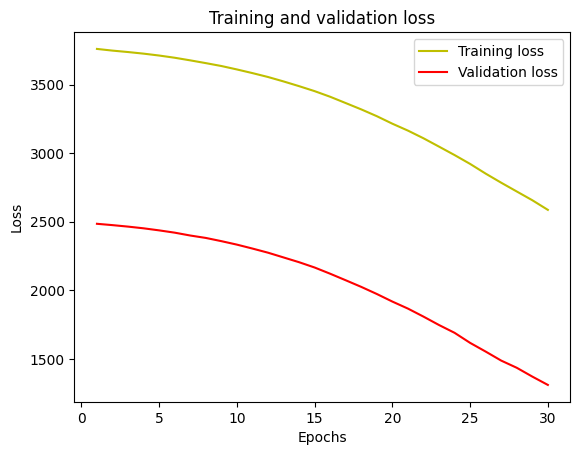

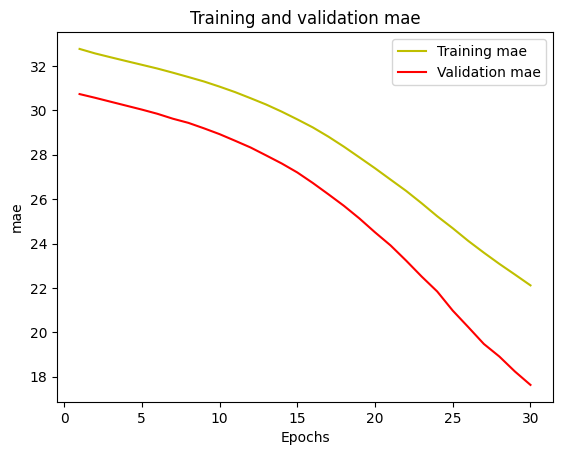

In [10]:
# 학습 결과 시각화

import matplotlib.pyplot as plt
import seaborn as sns

# loss 시각화
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim() # y축 (최소값, 최대값) 설정
plt.legend()
plt.show()

# mae 시각화
mae =model_history.history['mae']
val_mae =model_history.history['val_mae']
plt.plot(epochs, mae, 'y', label='Training mae')
plt.plot(epochs, val_mae, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [11]:
# 주어진 데이터(X, y)를 이용해 모델 평가. 모델 작동 후 loss 등 모델 선언 시 지정해 둔 모델 평가 지표를 출력.

model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1248.5776 - mae: 17.3025 - mse: 1248.5776


[1310.2393798828125, 1310.2393798828125, 17.632421493530273]